#Assignment 3

> Objective of Assignment is primarily to compare different classifier on primarily on non linearly seperable Data

The Dataset we will gonna use is Pima Indian Dataset (Binary Classification) The Information Regarding the Dataset is Provided Below , 

----------------------------------------------------------------

## Pima Indian Datase

Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

Number of Instances: 768
Number of Attributes: 8 plus class 

For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

Accurately predict whether or not the patients in the dataset have diabetes or not

* 0-> do not have Diabetes
* 1 -> Do have Diabetes



--------------------------------------------------------------------------------

In [ ]:
# Summarize the Pima Indians Diabetes dataset
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import numpy as np
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
dataframe = read_csv(url, header=None)
Classification_Perfomance=pd.DataFrame(columns=['Classifier','F1_Score','Accuracy'])

In [ ]:
primdataset = dataframe.dropna(axis=0)

**In the following lines What we do is following, We would standardize the Feature Vectors for an effective fit to the underlying Maching Learning Algorithm, furthermore we would be Splitting our Dataset into 70 30 Ratio**

In [ ]:
Predictor_Values = dataframe.iloc[:,8]
Feature_Vector=dataframe.iloc[:,1:7]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scale=StandardScaler()

In [ ]:
Normalized_Feature=Scale.fit_transform(Feature_Vector)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Normalized_Feature, Predictor_Values, test_size=0.3, random_state=42) 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
dataframe.iloc[:,8].value_counts()

0    500
1    268
Name: 8, dtype: int64

 **For the classification Precision Recall Works Best as accuracy may not give true perfomance in case of Unbalanced Classification (Here dataset is unbalanced see above table) .  Furthermore we would try to use an F1 Score as it as an accurate measure and good tradeoff between precision and recall**

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

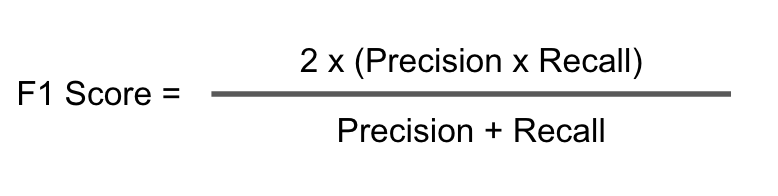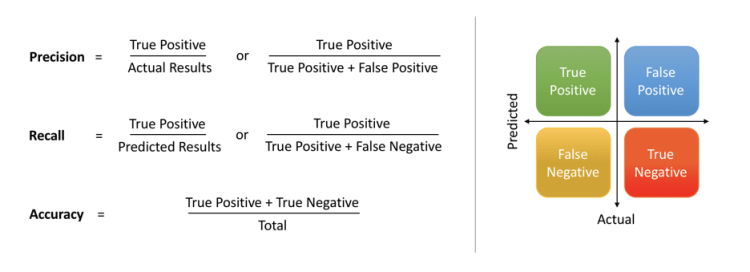

# Logistic Regression 

[Logistic Regression - Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

### **Standard Gradient Descent Algorithm**

> Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function using gradient descent, we take steps proportional to the negative of the gradient of the function at the current point

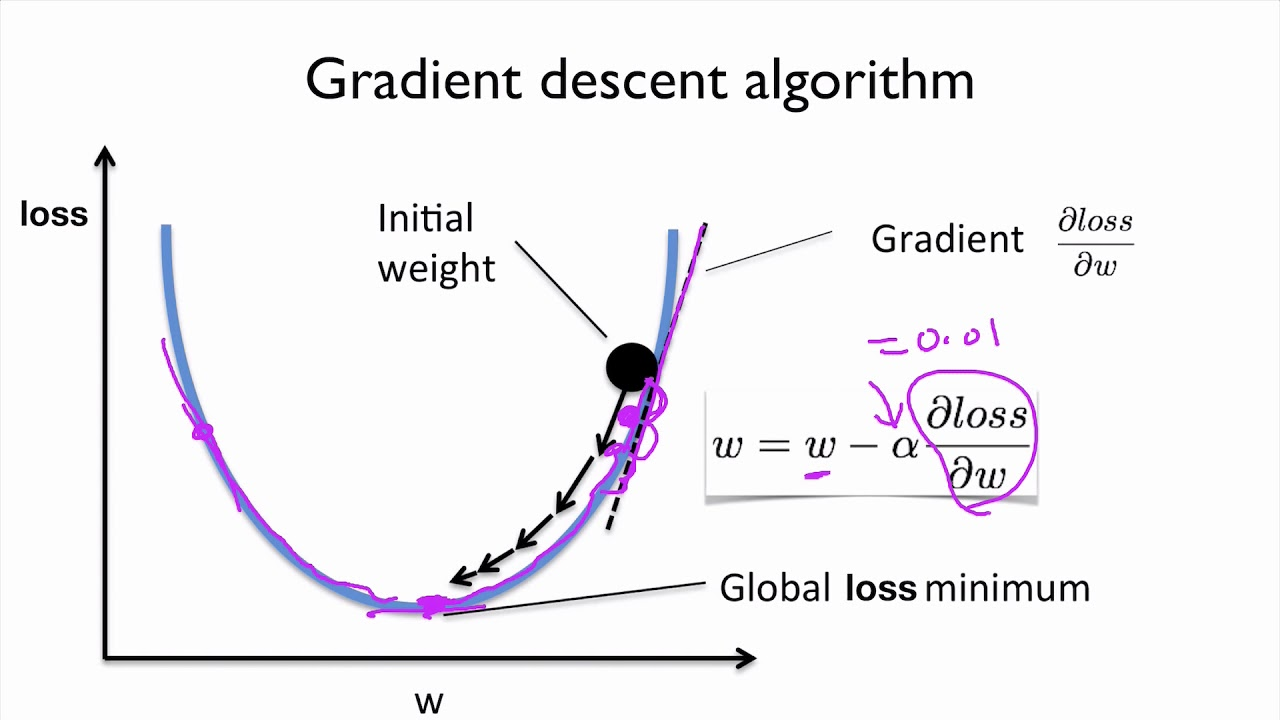

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [ ]:
LogGD=LogisticRegression()

In [ ]:
LogGD.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(classification_report(y_test,LogGD.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       151
           1       0.64      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [ ]:
F1_Log=f1_score(y_test,LogGD.predict(X_test))
Acc_Log=accuracy_score(y_test,LogGD.predict(X_test))

In [ ]:
F1_Log

0.5906040268456376

In [ ]:
Classification_Perfomance=Classification_Perfomance.append({"Classifier":"Logistic Regression GD",'F1_Score':F1_Log,'Accuracy':Acc_Log},ignore_index=True)
Classification_Perfomance

,Classifier,F1_Score,Accuracy
0,Logistic Regression GD,0.590604,0.735931


### **Stochastic Standard Gradient Descent Algorithm**



> Unlike the batch gradient descent which computes the gradient using the whole dataset, because the SGD, also known as incremental gradient descent, tries to find minimums or maximums by iteration from a single randomly picked training example, the error is typically noisier than in gradient descent.......

> However, this can also have the advantage that stochastic gradient descent can escape shallow local minima more easily.



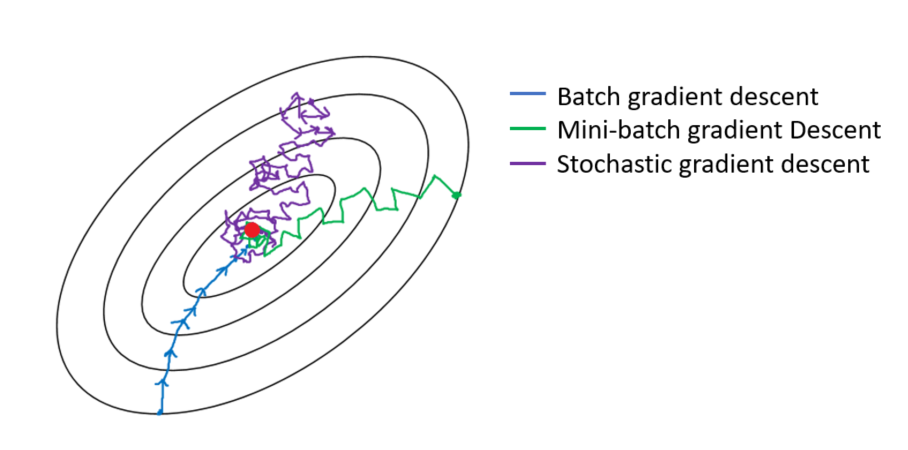

In [ ]:
LogSGD=SGDClassifier(loss="log") 

[Log](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) loss referes to Stochastic Version of Logistic Regression

In [ ]:
LogSGD.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print(classification_report(y_test,LogSGD.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74       151
           1       0.54      0.66      0.59        80

    accuracy                           0.68       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.68      0.69       231



In [ ]:
F1_SGDLog=f1_score(y_test,LogSGD.predict(X_test))
Acc_=accuracy_score(y_test,LogSGD.predict(X_test))

In [ ]:
F1_SGDLog
Classification_Perfomance=Classification_Perfomance.append({"Classifier":"Logistic Regression SGD",'F1_Score':F1_SGDLog,'Accuracy':Acc_},ignore_index=True)
Classification_Perfomance

,Classifier,F1_Score,Accuracy
0,Logistic Regression GD,0.590604,0.735931
1,Logistic Regression SGD,0.592179,0.683983


# Support Vector Machines



> [Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine) - Wikipedia

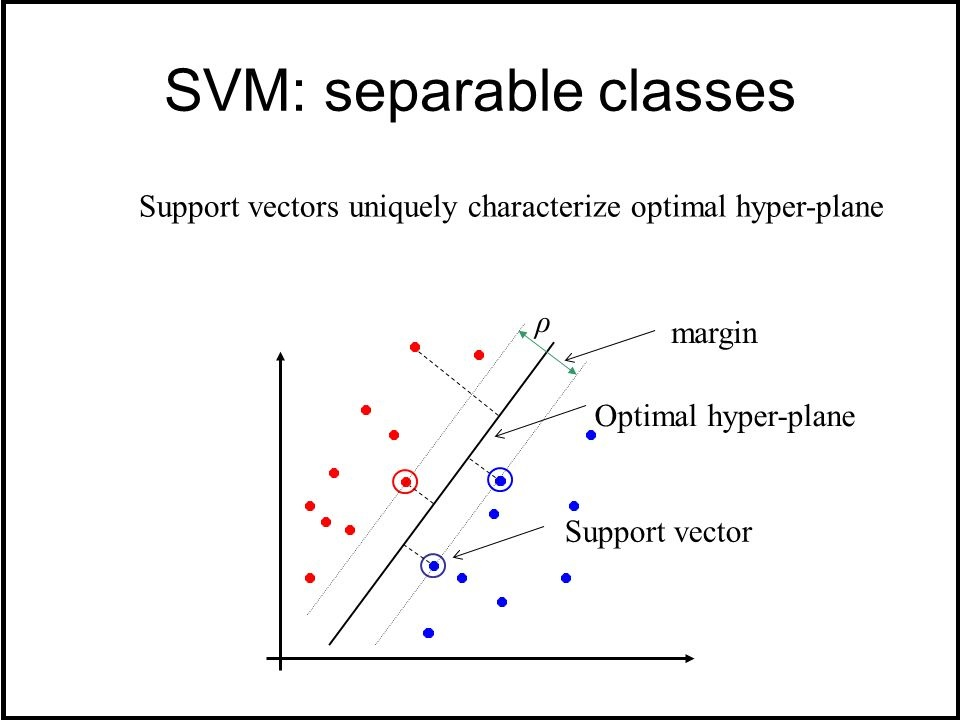





### Linear SVM

Linear SVM - The Hyperplane Decision Boundary 



In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
LSVM = LinearSVC(max_iter=1500) #Squared Hinge is the LOSS Function Here

In [ ]:
LSVM.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print(classification_report(y_test,LSVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       151
           1       0.63      0.54      0.58        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.73       231



In [ ]:
F1_LSVM=f1_score(y_test,LSVM.predict(X_test))
Acc_=accuracy_score(y_test,LSVM.predict(X_test))

In [ ]:
F1_LSVM
Classification_Perfomance=Classification_Perfomance.append({"Classifier":"SVM Linear",'F1_Score':F1_LSVM,'Accuracy':Acc_},ignore_index=True)
Classification_Perfomance

,Classifier,F1_Score,Accuracy
0,Logistic Regression GD,0.590604,0.735931
1,Logistic Regression SGD,0.592179,0.683983
2,SVM Linear,0.581081,0.731602


## Polynomial SVM Kernal

> The polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.

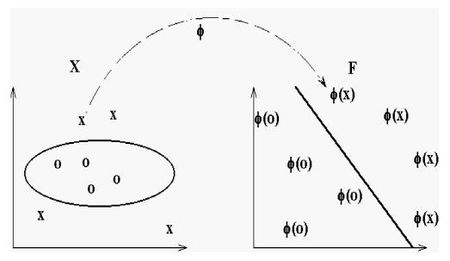

> **Illustration of the mapping phi**  . On the left a set of samples in the input space, on the right the same samples in the feature space where the polynomial kernel K(x,y) (for some values of the parameters c and d) is the inner product. The hyperplane learned in feature space by an SVM is an ellipse in the input space.

In [ ]:
from sklearn.svm import SVC

In [ ]:
PolySVC=SVC(kernel="poly")

In [ ]:
PolySVC.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
F1_PolySVC=f1_score(y_test,PolySVC.predict(X_test))
Acc_=accuracy_score(y_test,PolySVC.predict(X_test))

In [ ]:
F1_PolySVC

0.4881889763779528

In [ ]:
Classification_Perfomance=Classification_Perfomance.append({"Classifier":"SVM Polynomial",'F1_Score':F1_PolySVC,"Accuracy":Acc_},ignore_index=True)
Classification_Perfomance

,Classifier,F1_Score,Accuracy
0,Logistic Regression GD,0.590604,0.735931
1,Logistic Regression SGD,0.592179,0.683983
2,SVM Linear,0.581081,0.731602
3,SVM Polynomial,0.488189,0.718615


## Gausian Kernal

> In machine learning, the radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification..
The RBF kernel on two samples x and x', represented as feature vectors in some input space, is defined as

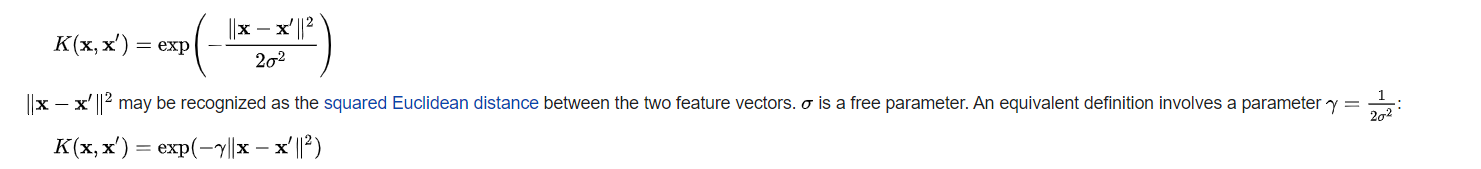



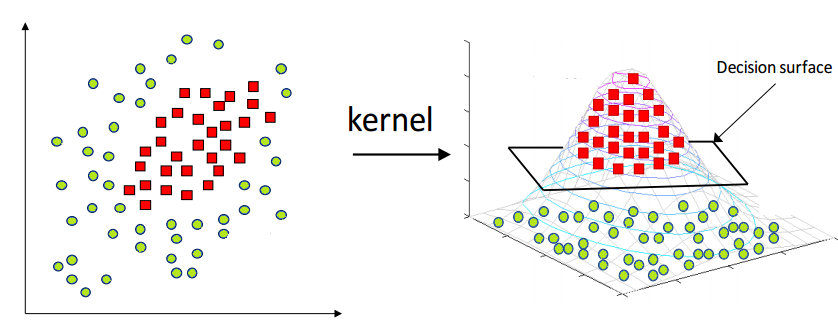

In [ ]:
GausSVC=SVC(kernel='rbf')

In [ ]:
GausSVC.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
F1_GaussSVC=f1_score(y_test,GausSVC.predict(X_test))
Acc_=accuracy_score(y_test,GausSVC.predict(X_test))

In [ ]:
F1_GaussSVC

0.5789473684210527

In [ ]:
Classification_Perfomance=Classification_Perfomance.append({"Classifier":"SVM Gauss Kernal",'F1_Score':F1_GaussSVC,'Accuracy':Acc_},ignore_index=True)
Classification_Perfomance

,Classifier,F1_Score,Accuracy
0,Logistic Regression GD,0.590604,0.735931
1,Logistic Regression SGD,0.592179,0.683983
2,SVM Linear,0.581081,0.731602
3,SVM Polynomial,0.488189,0.718615
4,SVM Gauss Kernal,0.578947,0.722944


### SVM (Soft SVM Formulation) Different Regularization

> The SOFT SVM Formulation allows for a Regularization Parameter, Higher Value of Regularization restrict the no of missclassification point and thus tends to degenrate to a Hard SVM Formuation, Low Value of Regularization Parameter (Lambda) allows the inclusion of some missclassified Points. Hence The Lambda is tradeoff between the Penalty that should be associated with missclassified Points

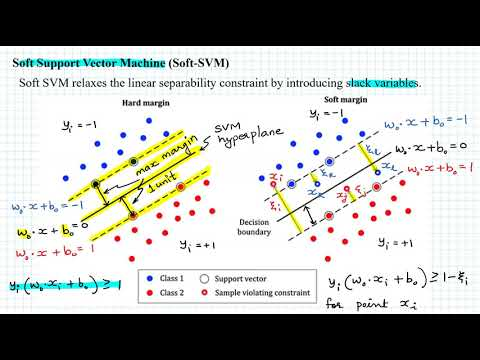

In [ ]:
Regularize = pd.DataFrame(columns=['Regularization Parameter','Accuracy','F1 score','Support Vectors'])

In [ ]:
Lst=[]
for T in [0.3,0.2,0.1]:
  Regularize = pd.DataFrame(columns=['Regularization Parameter','Accuracy','F1 score','Support Vectors'])
  for c in np.arange(0.1,14,1):
    X_train, X_test, y_train, y_test = train_test_split(Normalized_Feature, Predictor_Values, test_size=T, random_state=42) 
    SoftSVC=SVC(C=c)
    SoftSVC.fit(X_train,y_train)  
    acc=accuracy_score(y_test,SoftSVC.predict(X_test))
    f1=f1_score(y_test,SoftSVC.predict(X_test))
    Support=SoftSVC.n_support_
    dictionary={'Regularization Parameter':c,'Accuracy':acc,'F1 score':f1,'Support Vectors':Support}
    Regularize=Regularize.append(dictionary,ignore_index=True)
  Lst.append(Regularize)

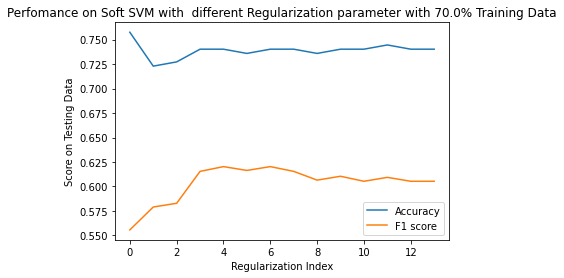

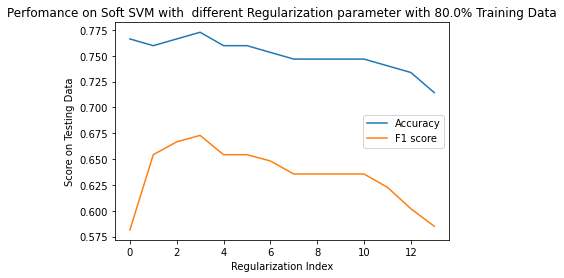

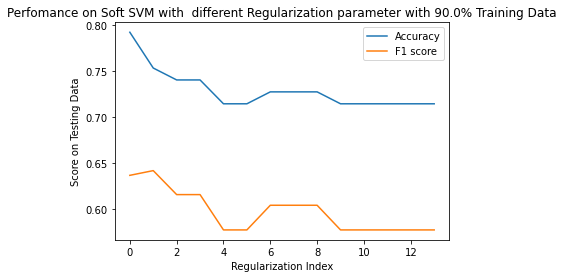

In [ ]:
index=0
Listing=[0.7,0.8,0.9]
for X in Lst:
  X[['Accuracy','F1 score']].plot()
  plt.title("Perfomance on Soft SVM with  different Regularization parameter with "+str(Listing[index]*100)+"% Training Data")
  plt.xlabel("Regularization Index")
  plt.ylabel("Score on Testing Data")
  index+=1

In [ ]:
print("Support Vector With different Regularization Parameters and Training Data\n")
index=0

for X in Lst:
  print("                  :) "+str(Listing[index]*100) + "% Training Data\n")
  print(X)
  print()
  index+=1

Support Vector With different Regularization Parameters and Training Data

                  :) 70.0% Training Data

    Regularization Parameter  Accuracy  F1 score Support Vectors
0                        0.1  0.757576  0.555556      [190, 186]
1                        1.1  0.722944  0.578947      [158, 150]
2                        2.1  0.727273  0.582781      [156, 146]
3                        3.1  0.740260  0.615385      [158, 144]
4                        4.1  0.740260  0.620253      [156, 146]
5                        5.1  0.735931  0.616352      [156, 144]
6                        6.1  0.740260  0.620253      [156, 141]
7                        7.1  0.740260  0.615385      [149, 141]
8                        8.1  0.735931  0.606452      [150, 142]
9                        9.1  0.740260  0.610390      [150, 140]
10                      10.1  0.740260  0.605263      [147, 140]
11                      11.1  0.744589  0.609272      [149, 140]
12                      12.1  0.740260

**Looking from the Plots it looks like the Soft SVM Classification is quite sensitive to input data and tends to perform well with higher training set**

**However We will Be using 70% Training data for consistent Comparision. To better Illustrate which lambda value would be more appropriate we would be using GridSearch SVM function to search the hypothesis space**

------------------------------------------------------------

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Normalized_Feature, Predictor_Values, test_size=0.3, random_state=42) 

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
SoftSVCRegularization=SVC(C=c)
clf = GridSearchCV(SoftSVCRegularization, parameters)
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=13.1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 1, 'kernel': 'linear'}
0.7802526825891312


**The Linear Kernal Perfoms better than non linear kernals with Regularizations Parameter 1**

In [ ]:
F1_SoftSVC=f1_score(y_test,clf.predict(X_test))
Acc_Log=accuracy_score(y_test,clf.predict(X_test))
Classification_Perfomance=Classification_Perfomance.append({"Classifier":"SVM Soft : (Best regulaziation perfomance)",'F1_Score':F1_SoftSVC,'Accuracy':Acc_},ignore_index=True)
Classification_Perfomance

,Classifier,F1_Score,Accuracy
0,Logistic Regression GD,0.590604,0.735931
1,Logistic Regression SGD,0.592179,0.683983
2,SVM Linear,0.581081,0.731602
3,SVM Polynomial,0.488189,0.718615
4,SVM Gauss Kernal,0.578947,0.722944
5,SVM Soft : (Best regulaziation perfomance),0.589041,0.722944


# Half space Classifier (Perceptron)

> In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

> [Half Space / Perceptron - Wiki](https://en.wikipedia.org/wiki/Perceptron)


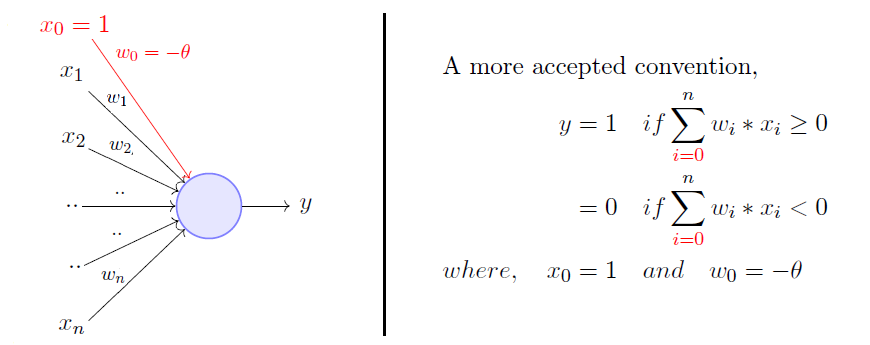

>  **Intialization**

In [ ]:
X_train.shape

(537, 6)

In [ ]:
Weights = [0.01] *7
Weights #6 for Feature Vector and One with Bias

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

In [ ]:

def Evaluation(train,weights):
  Summation=0
  for i in range(len(train)):
   # print(train[i],weights[i])
    Summation+=train[i] * weights[i]
  Summation+=weights[6]
#  print(Summation)
  if Summation>1:
    return 1
  else:
    return 0
  


> **Training**

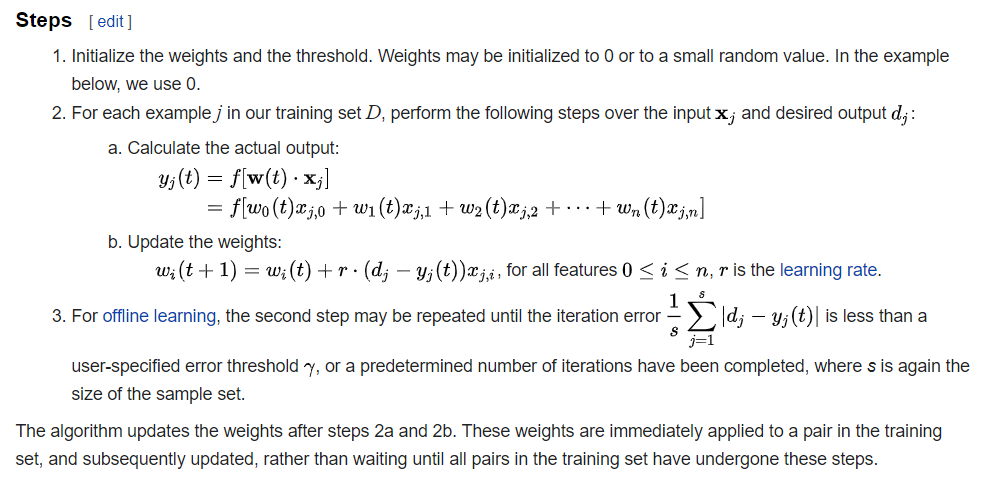

In [ ]:
_# Training 

epochs=1
alpha=0.1

for epochs in range(epochs):
  for i in range(len(X_train)):
    Predictons=Evaluation(X_train[i],Weights)
    for j in range(6):
     Weights[j]=Weights[j]+alpha*(y_train.iloc[i]-Predictons)*X_train[i,j]
    Weights[6]=Weights[6]+alpha*(y_train.iloc[i]-Predictons)


> **Prediction and Evaluation**

In [ ]:
predictions=[]
for Sample in X_test:
  predictions.append(Evaluation(Sample,Weights))


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       151
           1       0.55      0.46      0.50        80

    accuracy                           0.68       231
   macro avg       0.65      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



In [ ]:
F1_Percep=f1_score(y_test,predictions)
Acc_=accuracy_score(y_test,predictions)
Classification_Perfomance=Classification_Perfomance.append({"Classifier":"Half Space Classifier (Perceptron)",'F1_Score':F1_Percep,'Accuracy':Acc_},ignore_index=True)


------------------------------------------------------------------------------------------

-------------------------------------

# Conclusion

In [ ]:
Classification_Perfomance

,Classifier,F1_Score,Accuracy
0,Logistic Regression GD,0.590604,0.735931
1,Logistic Regression SGD,0.592179,0.683983
2,SVM Linear,0.581081,0.731602
3,SVM Polynomial,0.488189,0.718615
4,SVM Gauss Kernal,0.578947,0.722944
5,SVM Soft : (Best regulaziation perfomance),0.589041,0.722944
6,Half Space Classifier (Perceptron),0.503401,0.683983


0    151
1     80
Name: 8, dtype: int64


Text(0, 0.5, 'Score Testing Data')

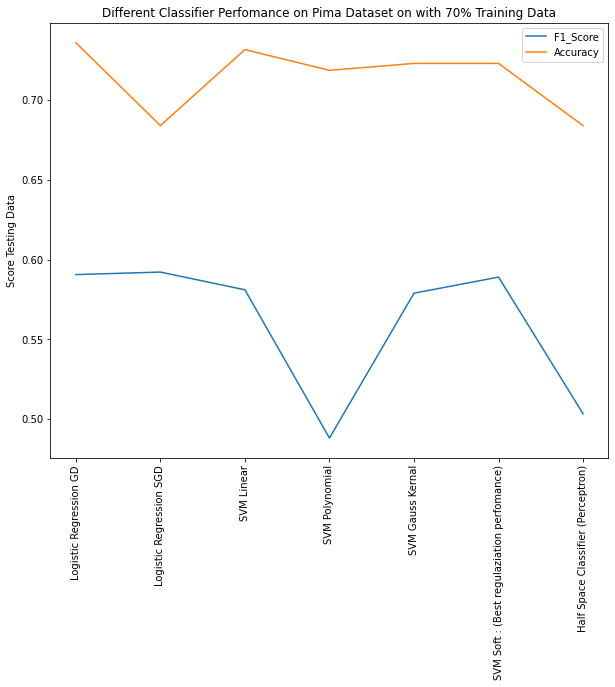

In [ ]:
X=[0,1,2,3,4,5,6]
Y=Classification_Perfomance['Classifier']
print(y_test.value_counts())
Classification_Perfomance.plot(figsize=(10,8))
l=plt.xticks(X, Y, rotation ='vertical') 
plt.title("Different Classifier Perfomance on Pima Dataset on with 70% Training Data")
plt.ylabel("Score Testing Data")

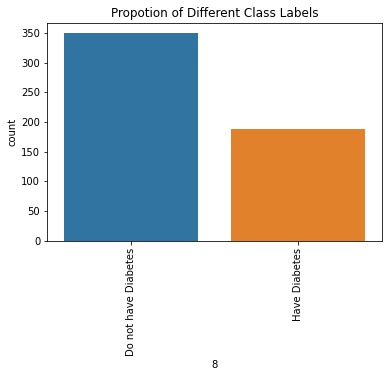

In [ ]:
import seaborn as sns
sns.countplot(y_train)
X=[0,1]
y=['Do not have Diabetes','Have Diabetes']
plt.title("Propotion of Different Class Labels")
l=plt.xticks(X, y, rotation ='vertical')

1. **By looking at the above plot It seems the F1 Score should be more appropriate to accurately reflect the perfomance, since the data is unbalanced accuracy might not gave the most accurate estimate of perfomance**

2. **F1 Score is lower than the accuracy which is expected on an unbalanced binary classification..**

3. **Logistic Regression Works Best here (both GD and SGD version). SVM kernals managed to give an effective perfomance barring the polynomial Kernal which perfomed worse than even the simplistic Perceptron Algorithm**

4. **A note about the SVM Kernals, The linear kernal here works better than the Poly and Gauss Kernals with Lambda Value of 1 (as choosen By Grid Search CV after checking the possibilities). Here in the classification dataset it refers to SVM Soft : (Best regulaziation perfomance)**






# References

[Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works Akshay L Chandra](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)

[Perceptron-Wiki](https://en.wikipedia.org/wiki/Perceptron)

[SVM - Data Science Lovers](http://www.datasciencelovers.com/tag/svm/)

[Grid Search CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[What is the kernel trick? Why is it important? Grace Zhang](https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d)

[Polynomial Kernal- Wiki](https://en.wikipedia.org/wiki/Polynomial_kernel)

[PyTorch Lecture 03: Gradient Descent](https://www.youtube.com/watch?v=b4Vyma9wPHo)

[Variants of Gradient Descent](https://suniljangirblog.wordpress.com/2018/12/13/variants-of-gradient-descent/)

[sklearn SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[Soft SVM - Soft Support Vector Machine - Machine Learning](https://www.youtube.com/watch?v=7vSGI9FCCaY)


